In [2]:
# Import the necessary libraries:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Step 1: Load and Prepare the Data

- Load the Iris dataset and split it into features (X) and target (y). 
- Then split into training (80%) and testing (20%) sets.

In [28]:
# extract the data and each data points encoded labels
X, y = load_iris(return_X_y=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 2: Preprocess the Data

- Standardize the features using `StandardScaler`.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Step 3: Train a Model

Train a `LogisticRegression` model on the scaled training data.

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## Step 4: Make Predictions and Evaluate

Predict on the test set and compute the following metrics:

- Accuracy
- Precision (macro-averaged)
- Recall (macro-averaged)
- F1-Score (macro averaged)
- Confusion Matrix

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_pred = lr_model.predict(X_test_scaled)

In [41]:
accuracy_score(y_test, y_pred)

1.0

In [43]:
precision_score(y_test, y_pred, average='macro')

1.0

In [45]:
recall_score(y_test, y_pred, average='macro')

1.0

In [47]:
f1_score(y_test, y_pred, average='macro')

1.0

In [51]:
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

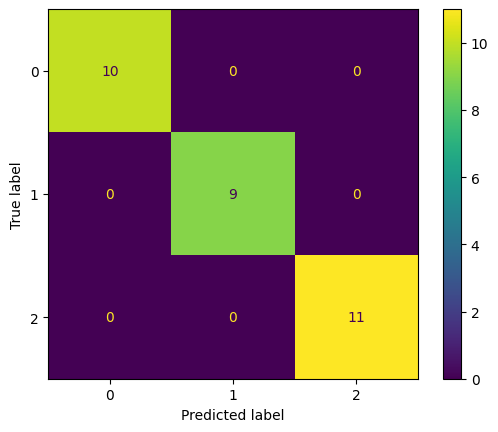

In [54]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_).plot()

## Step 6: Load and Prepare the Data

- Load the California Housing dataset
- Split it into features (X) and target (y)
- Use a smaller subset (first 1000 samples) to keep computation quick
- Split into training (80%) and testing (20%) sets.

In [ ]:
housing_data = fetch_california_housing()

In [ ]:
X = housing_data.data
y = housing_data.target

In [ ]:
# Select 1000 random samples from X and Y
rand_indices = np.random.choice(X.shape[0], 1000, replace=False)
X_sample = X[rand_indices]
y_sample = y[rand_indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Preprocess the Data

- Standardize the features using `StandardScaler`.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

## Step 8: Train a Model

- Train a `LinearRegression` model on the scaled training data.

In [ ]:
lin_regr = LinearRegression().fit(X_train_s, y_train)

## Step 9: Make Predictions and Evaluate

Predict on the test set and compute:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score

In [ ]:
y_pred = lin_regr.predict(X_test_s)

In [ ]:
mean_squared_error(y_test, y_pred)

0.4751080439736961

In [ ]:
# root mean squared error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.689280816484614


In [ ]:
r2_score(y_test, y_pred)

0.6577503501862263

## Step 10: Interpret the Results


- What does the RMSE tell you about the average prediction error in house prices?
- Does the R² score indicate a good fit? Why or why not?

RMSE holds a value of 0.69. This shows that the average prediction error in house prices is somewhat high. Or varies considerably.

R2 indicates a value of 0.65. This is generally considered relatively high, or a good fit.



## Step 11: Load and Prepare the Data
- You’ll use the Breast Cancer dataset to predict whether a tumor is malignant (1) or benign (0).

- Load the dataset and split it into features (X) and target (y). 
- Split into training (70%) and testing (30%) sets.

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 12: Preprocess the Data

- Standardize the features using StandardScaler.

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

## Step 13: Train Two Models

Train two models:

- Logistic Regression
- Random Forest Classifier (with n_estimators=100, random_state=42)

In [6]:
lr_model = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)

## Step 14: Generate Predictions

- Get probability predictions for the test set from both models (use `.predict_proba` and take the probability for class 1).

In [7]:
# Probability predictions
X_test_scaled = scaler.transform(X_test)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

## Step 15: Compute ROC Curves

- Use roc_curve to calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for both models.
- Compute the Area Under the Curve (AUC) using auc.

In [12]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [13]:
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [20]:
print("Area under curve for Logistic Regression:", lr_auc)
print("Area under curve for Random Forest:", rf_auc)

Area under curve for Logistic Regression: 0.99737962659679
Area under curve for Random Forest: 0.995250573206682


## Step 16: Plot ROC Curves

- Plot the ROC curves for both models on the same graph. Include a diagonal line (random guessing baseline).

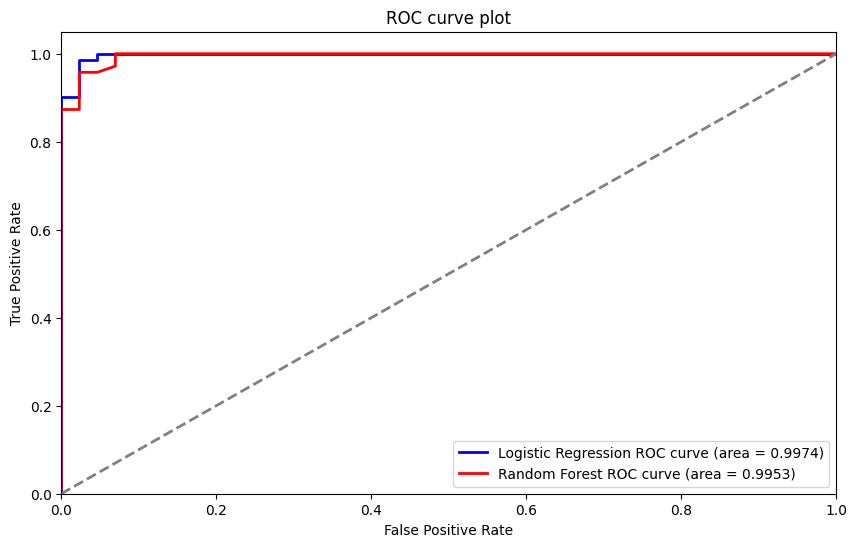

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2,
         label="Logistic Regression ROC curve (area = %0.4f)" % lr_auc)

plt.plot(rf_fpr, rf_tpr, color='red', lw=2,
         label="Random Forest ROC curve (area = %0.4f)" % rf_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve plot')
plt.legend(loc="lower right")
plt.show()

## Step 17: Compute Additional Metrics

- For context, compute the classification report for both models using their binary predictions (threshold = 0.5).

In [ ]:
# Logistic Regression
print(classification_report(y_test, (lr_probs >= 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Random Forest
print(classification_report(y_test, (rf_probs >= 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Step 18: Interpret the ROC Curves

- What does the AUC value tell you about each model’s ability to distinguish between classes?
- How do the ROC curves’ shapes differ, and what might that suggest about model behavior at different thresholds?
- Based on the classification report, how does the ROC analysis complement precision and recall?

The AUC is really high, 99+% for both models which shows that both models can distinguish between classes very well.

The ROC curve shapes show that the roc of Logistic Regression is steeper at earlier threshold. This shows that earlier thresholds distinguish the models more strongly than later on.

We can see precision and recall for both models is  nearly identical. ROC gives more detailed insight to help distinguish the models from each other.

## Step 19: Reflection

- How might you use the ROC curve to choose a threshold for this cancer diagnosis task (e.g., prioritizing sensitivity)? 
- What did you learn about the trade-offs between models from this exercise?

We can use ROC to identify the threshold for an acceptable level of sensitivity. We may use ROC to minimize the FPR to minimize unnecessary patient scare.
The trade off is ultimately between FPR or TPR and what you prioritize.